# Scenario Generation

Notebook for generating the scenarios for the team assignment.
<br>Datasets from: Pinson, P. (2013). Wind Energy: Forecasting Challenges for Its Operational Management. Statistical Science, 28(4). https://doi.org/10.1214/13-STS445


In [3]:
using CSV
using DataFrames
using Plots
using Statistics
using Distributions
using Random
using Clustering
using KernelDensity
using PrettyTables

In [4]:
using StatsModels, TimeSeries, StatsBase

In [5]:
gr()

Plots.GRBackend()

## Dataset Inspection

In [6]:
df_zone1 = CSV.read("data/scen_zone1.out", DataFrame)

┌ Warning: thread = 1 warning: only found 1 / 101 columns around data row: 45. Filling remaining columns with `missing`
└ @ CSV C:\Users\user\.julia\packages\CSV\Zl2ww\src\file.jl:612


,Column1,V1,V2,V3,V4,V5,V6,V7
,String,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?
1,1,0.38446,0.5077,0.464001,0.476854,0.48001,0.354537,0.60302
2,2,0.334138,0.454995,0.545837,0.539686,0.518081,0.563092,0.684236
3,3,0.39211,0.584795,0.714401,0.673901,0.641382,0.669161,0.721244
4,4,0.320718,0.671243,0.797851,0.668318,0.714843,0.771167,0.735419
5,5,0.511098,0.727537,0.804719,0.826516,0.720152,0.807448,0.772645
6,6,0.670195,0.655562,0.785114,0.809138,0.723181,0.776111,0.678846
7,7,0.732583,0.768349,0.70783,0.799635,0.764298,0.76802,0.712148
8,8,0.715879,0.816962,0.77647,0.854024,0.793214,0.821533,0.714239
9,9,0.816484,0.722401,0.863191,0.92659,0.754504,0.832788,0.709939


In [7]:
df_zone1 = dropmissing(df_zone1, disallowmissing=true)
select!(df_zone1, Not(1))

pretty_table(df_zone1)

┌───────────┬──────────┬───────────┬───────────┬────────────┬────────────┬───────────┬───────────┬───────────┬───────────┬───────────┬────────────┬───────────┬──────────┬──────────┬───────────┬───────────┬────────────┬───────────┬────────────┬────────────┬───────────┬──────────┬───────────┬───────────┬──────────┬───────────┬───────────┬────────────┬──────────┬───────────┬────────────┬───────────┬────────────┬──────────┬───────────┬───────────┬──────────┬──────────┬───────────┬──────────┬───────────┬──────────┬───────────┬───────────┬───────────┬──────────┬───────────┬───────────┬──────────┬───────────┬──────────┬──────────┬───────────┬───────────┬───────────┬────────────┬──────────┬────────────┬───────────┬───────────┬───────────┬───────────┬───────────┬──────────┬──────────┬───────────┬───────────┬───────────┬──────────┬───────────┬───────────┬──────────┬───────────┬──────────┬───────────┬──────────┬───────────┬──────────┬───────────┬───────────┬──────────┬──────────┬───────────┬─────

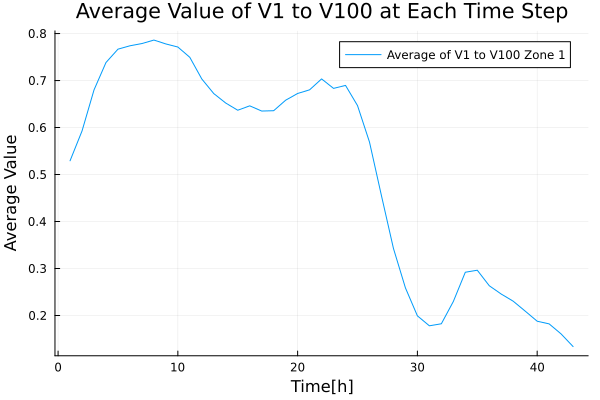

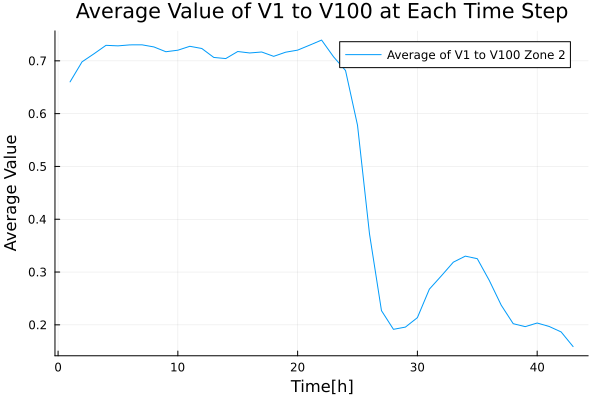

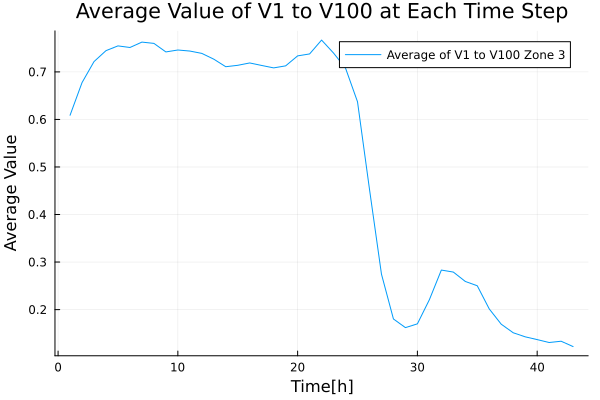

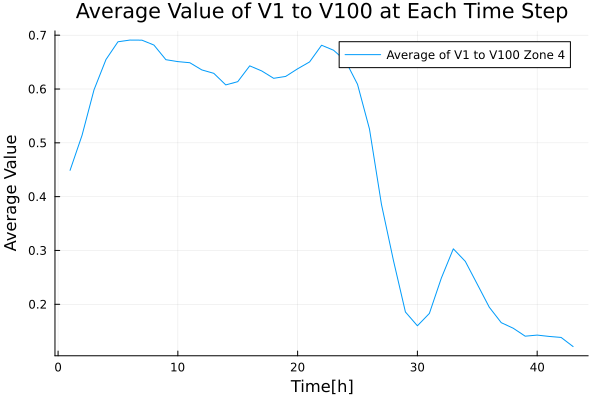

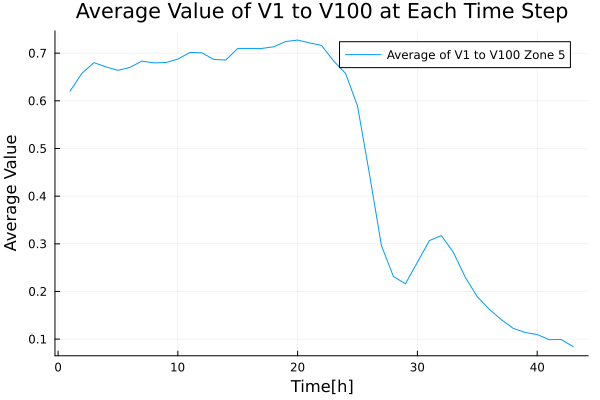

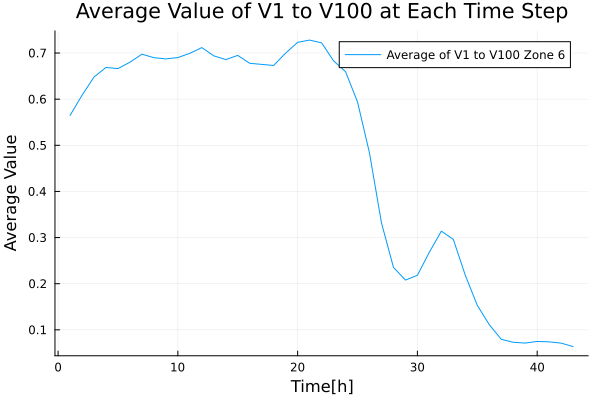

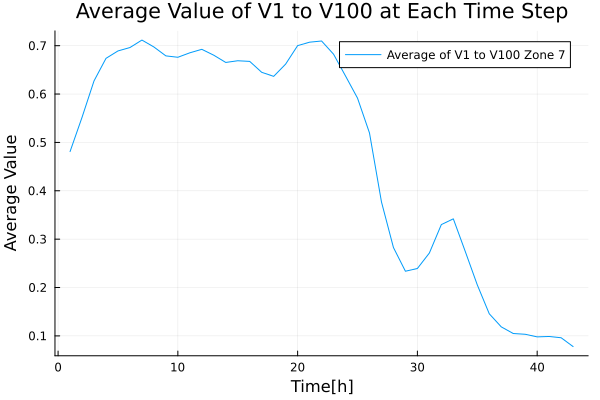

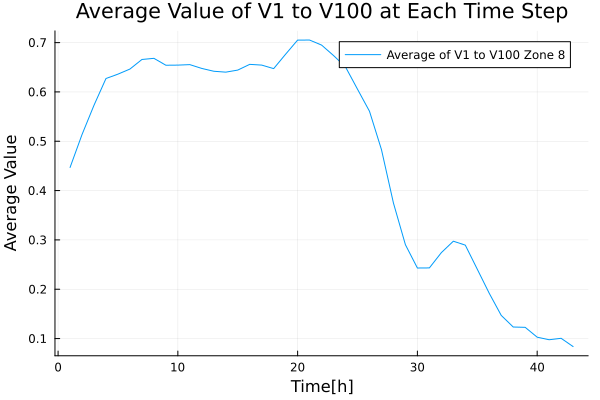

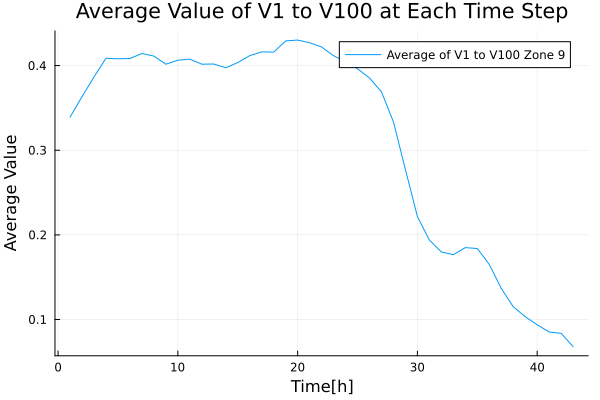

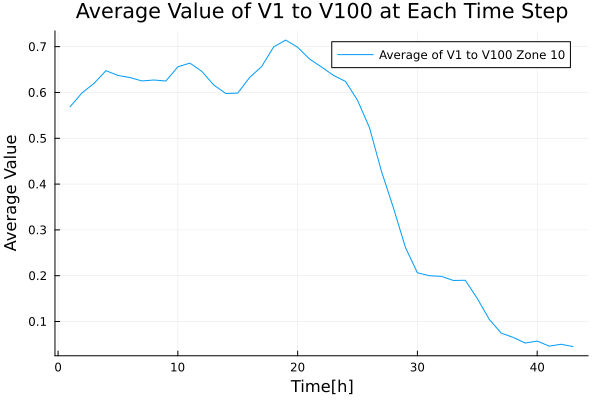

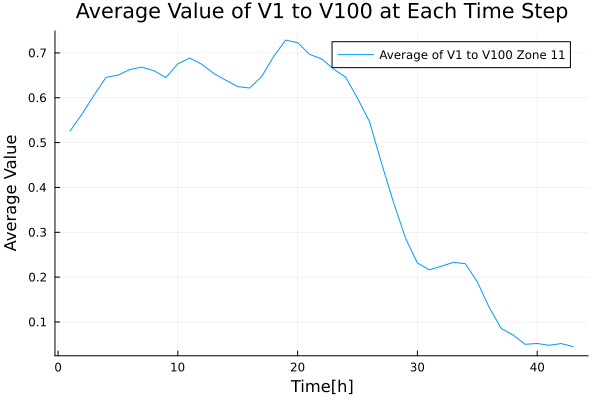

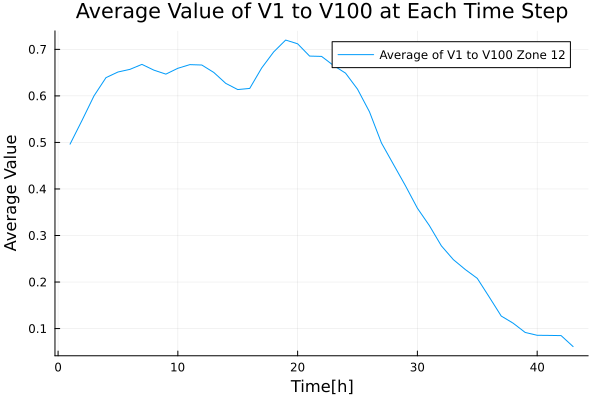

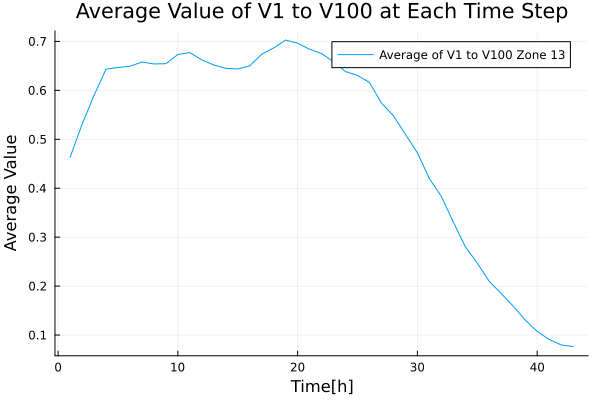

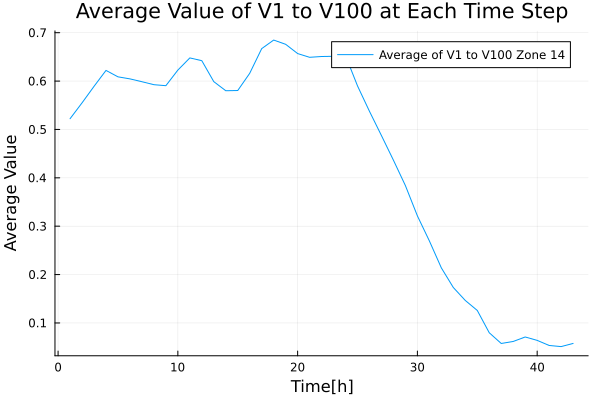

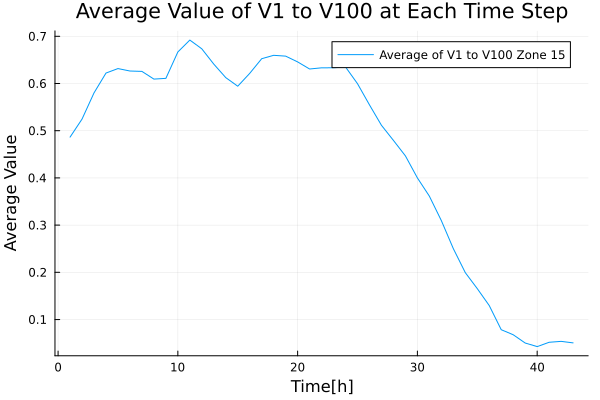

In [8]:
# Define the number of zones 
num_zones = 15

df_zones = DataFrame()

# Suppresses warnings about missing values
function suppress_csv_warnings(zone)
    file_path = "data/scen_zone$zone.out"
    return DataFrame(CSV.File(file_path, silencewarnings=true))
    
end

# Iterate over zones
for zone in 1:num_zones
    
    # Read dataframe
    df = suppress_csv_warnings(zone)

    # Clean dataframe
    df = dropmissing(df, disallowmissing=true)
    select!(df, Not(1))

    # Calculate and plot mean values
    row_means = [mean(skipmissing(row)) for row in eachrow(df)]
    df_means = DataFrame(RowMean = row_means)
    p = plot(df_means.RowMean, label="Average of V1 to V100 Zone $zone", xlabel="Time[h]", ylabel="Average Value", title="Average Value of V1 to V100 at Each Time Step")
    display(p) 

    # Rename column
    DataFrames.rename!(df_means, "RowMean" => "Avg_Zone_$zone")
       
    # Concatenate dataframes
    if ncol(df_zones) == 0
        df_zones = df_means
    else
        df_zones = hcat(df_zones, df_means, makeunique=true)
    end
end


<p><img src="western_denmark.png" alt="Map of Denmark depicting the 15 zones" width="400"/>
<img src="wind_power_measurements.jpg" alt="Plots showing the wind power measurements in the 15 zones" width="600"/></p>


For some reason, some deviations (e.g. plot of zone 1 code vs. image)

## Inter-zonal Relationships

In [9]:
df_zones

,Avg_Zone_1,Avg_Zone_2,Avg_Zone_3,Avg_Zone_4,Avg_Zone_5,Avg_Zone_6,Avg_Zone_7
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.529259,0.660183,0.608828,0.448859,0.620302,0.56485,0.481107
2,0.592708,0.698176,0.67751,0.513925,0.65799,0.608469,0.551879
3,0.680013,0.713454,0.72169,0.598506,0.680121,0.648035,0.627172
4,0.738374,0.729425,0.744719,0.654851,0.671094,0.668735,0.67382
5,0.766749,0.728429,0.754726,0.687775,0.663946,0.666317,0.689165
6,0.773928,0.730288,0.751358,0.690962,0.670179,0.68012,0.696189
7,0.778704,0.730417,0.762698,0.690789,0.683436,0.69745,0.711647
8,0.786118,0.726389,0.759992,0.681714,0.67959,0.689923,0.697344
9,0.777854,0.717297,0.742022,0.654506,0.680343,0.687299,0.678945


In [10]:
# Correlation
cor_matrix = cor(Matrix(df_zones))
df_cor = DataFrame(cor_matrix, :auto)


,x1,x2,x3,x4,x5,x6,x7,x8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.0,0.948881,0.970948,0.98485,0.948454,0.957351,0.964872,0.963525
2,0.948881,1.0,0.993085,0.960897,0.980553,0.97047,0.959608,0.930494
3,0.970948,0.993085,1.0,0.983926,0.98867,0.986625,0.981173,0.959123
4,0.98485,0.960897,0.983926,1.0,0.970995,0.981427,0.988827,0.98389
5,0.948454,0.980553,0.98867,0.970995,1.0,0.995969,0.985681,0.968407
6,0.957351,0.97047,0.986625,0.981427,0.995969,1.0,0.995625,0.981654
7,0.964872,0.959608,0.981173,0.988827,0.985681,0.995625,1.0,0.989014
8,0.963525,0.930494,0.959123,0.98389,0.968407,0.981654,0.989014,1.0
9,0.939861,0.882464,0.915834,0.947238,0.938673,0.95099,0.956886,0.982252


In [11]:
# Covariance
cov_matrix = cov(Matrix(df_zones), corrected=false)
df_cov = DataFrame(cov_matrix, :auto)


,x1,x2,x3,x4,x5,x6,x7,x8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0528533,0.0510732,0.0583884,0.0491585,0.0535794,0.0562292,0.0521782,0.048728
2,0.0510732,0.0548138,0.0608171,0.0488444,0.0564107,0.0580473,0.0528473,0.0479224
3,0.0583884,0.0608171,0.0684209,0.0558791,0.0635465,0.0659327,0.0603704,0.0551885
4,0.0491585,0.0488444,0.0558791,0.0471395,0.051803,0.0544384,0.0505006,0.0469914
5,0.0535794,0.0564107,0.0635465,0.051803,0.0603797,0.0625239,0.0569725,0.0523459
6,0.0562292,0.0580473,0.0659327,0.0544384,0.0625239,0.0652693,0.0598321,0.0551687
7,0.0521782,0.0528473,0.0603704,0.0505006,0.0569725,0.0598321,0.0553308,0.0511759
8,0.048728,0.0479224,0.0551885,0.0469914,0.0523459,0.0551687,0.0511759,0.0483904
9,0.0269923,0.0258097,0.0299263,0.0256917,0.0288138,0.0303509,0.028118,0.0269925


## Scenario Generation

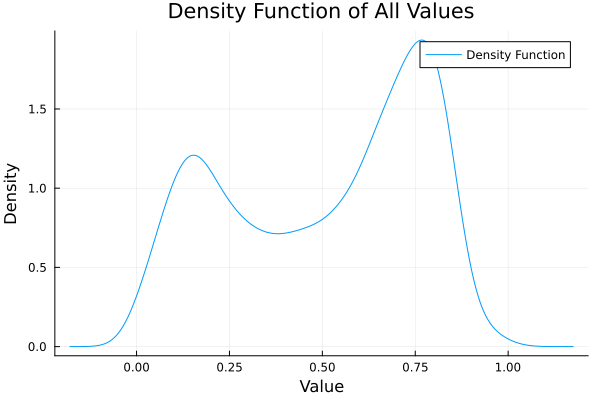

In [21]:
# Flatten the DataFrame to a 1D array and convert to Float64
values = Float64.(collect(Iterators.flatten(eachcol(df_zone1[:, :]))))  

# Compute the kernel density estimate (KDE)
kde_result = kde(values)

# Create a plot of the density estimate as a line
plot(kde_result.x, kde_result.density, label="Density Function", legend=:topright)
xlabel!("Value")
ylabel!("Density")
title!("Density Function of All Values")


In [35]:
# Basic scenario generation
n_scenarios = 100
n_hours = 24  # The number of time steps for each scenario

# Initialize an empty DataFrame to store the scenarios
scenarios = DataFrame()

# Generate the scenarios
for i in 1:n_scenarios
    # Create a column for each scenario with n_hours random values between 0 and 1
    scenarios[!, Symbol("Scenario_", i)] = rand(n_hours)
end

# `scenarios` DataFrame now has 24 rows and 100 columns,
# each column is a full 24-hour scenario with values between 0 and 1


In [36]:
scenarios

,Scenario_1,Scenario_2,Scenario_3,Scenario_4,Scenario_5,Scenario_6,Scenario_7
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.835837,0.967548,0.855746,0.930714,0.584367,0.435522,0.612565
2,0.308595,0.677674,0.83118,0.118775,0.467636,0.609795,0.691796
3,0.0349061,0.517622,0.805191,0.526374,0.833222,0.735104,0.0279513
4,0.0454296,0.781708,0.159257,0.24218,0.878,0.577369,0.663414
5,0.841206,0.710238,0.607412,0.561,0.590039,0.718797,0.483746
6,0.554431,0.650966,0.251013,0.593793,0.644524,0.568997,0.812358
7,0.0955408,0.383544,0.857858,0.862686,0.588549,0.848433,0.640148
8,0.976854,0.14058,0.542944,0.83363,0.62303,0.324284,0.673593
9,0.229827,0.121652,0.148282,0.687639,0.133455,0.227064,0.886479


## Clustering

In [16]:
# Transpose matrix to generate centers
km = kmeans(scenarios_matrix', 101)


LoadError: UndefVarError: `scenarios_matrix` not defined

In [17]:
km.centers

LoadError: UndefVarError: `km` not defined

Problems: Monte Carlo approach correctly implemented? Data just from one day (i.e. first 24 hours) with high wind speed. Interdependencies between wind speeds at different hours? Use time series to generate more realistic scenarios